# **Predicting Used Car Prices with Linear Regression**

**Problem Statement** \
Predict the price of used cars based on their features like mileage, year, model, brand, and fuel efficiency.\
\
**Data**\
Utilize a publicly available dataset such as Kaggle's "Used Cars" or UCI's "Car Evaluation" dataset. \
 \
Dataset used in this notebook:
https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog

# **1. Data Exploration and Pre-processing:**

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/dataset.csv"))
dataset.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [ ]:
dataset.shape

(38531, 30)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [ ]:
dataset.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [ ]:
dataset.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

All features have 100% non-null values except for engine_capacity that has 10 null values.\
10 rows is a small number and it won't significantly impact our analysis, so we will drop those rows.

In [ ]:
dataset.dropna(subset=['engine_capacity'], inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38521 non-null  object 
 1   model_name         38521 non-null  object 
 2   transmission       38521 non-null  object 
 3   color              38521 non-null  object 
 4   odometer_value     38521 non-null  int64  
 5   year_produced      38521 non-null  int64  
 6   engine_fuel        38521 non-null  object 
 7   engine_has_gas     38521 non-null  bool   
 8   engine_type        38521 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38521 non-null  object 
 11  has_warranty       38521 non-null  bool   
 12  state              38521 non-null  object 
 13  drivetrain         38521 non-null  object 
 14  price_usd          38521 non-null  float64
 15  is_exchangeable    38521 non-null  bool   
 16  location_region    385

In [ ]:
dataset.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

The columns *feature_0*, *feature_1*, *feature_2*, ..., *feature_9* are unknown, so we'll drop these features. \
The columns *is_exchangeable*, *location_region*, *number_of_photos*, *up_counter*, and *duration_listed*, are not features of the car itself, so we'll drop them too.

In [ ]:
dataset.drop(columns=['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'is_exchangeable', 'location_region', 'number_of_photos', 'up_counter', 'duration_listed'], inplace=True)
dataset.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11


In [ ]:
dataset.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd'],
      dtype='object')

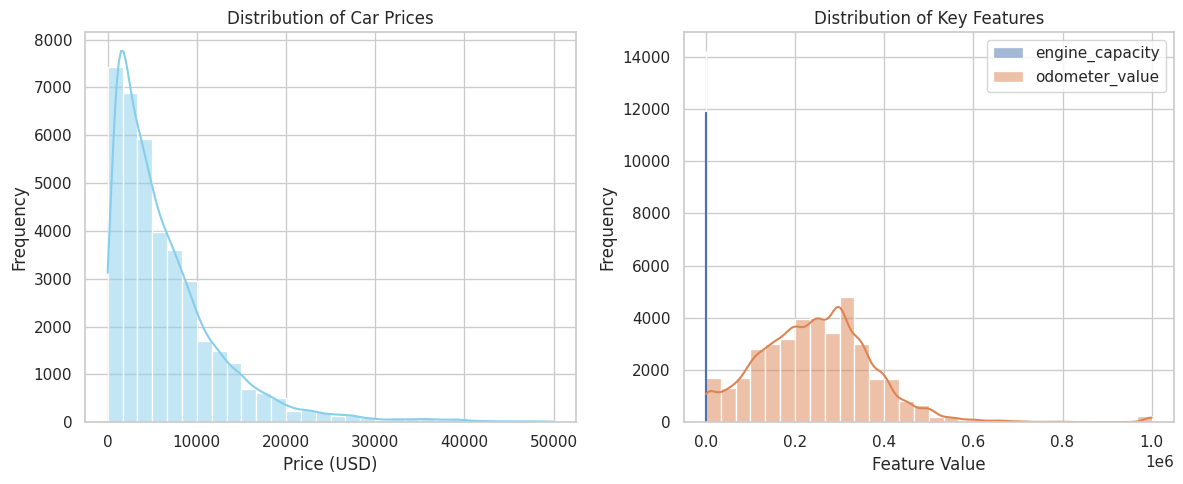

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Visualize the distribution of the target variable (car prices)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(dataset['price_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Visualize the distribution of key features
key_features = ['engine_capacity', 'odometer_value']
plt.subplot(1, 2, 2)
for feature in key_features:
    sns.histplot(dataset[feature], bins=30, kde=True, label=feature)

plt.title('Distribution of Key Features')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# **2. Feature Engineering:**

## **2.1. Creating a column for age and dropping the *year_produced* column:**

In [ ]:
# Creating the 'age' column
dataset['age'] = 2024 - dataset['year_produced']

# Droping the 'year_produced' column
dataset.drop(columns=['year_produced'], inplace=True)

dataset.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,age
0,Subaru,Outback,automatic,silver,190000,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,14
1,Subaru,Outback,automatic,blue,290000,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,22
2,Subaru,Forester,automatic,red,402000,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,23
3,Subaru,Impreza,mechanical,blue,10000,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,25
4,Subaru,Legacy,automatic,black,280000,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,23


## **2.2. Encoding categorical variables using label encoding:**

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['manufacturer_name', 'model_name', 'transmission', 'color',
                        'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type',
                        'has_warranty', 'state', 'drivetrain']

label_encoder = LabelEncoder()

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

dataset.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,age
0,45,763,0,8,190000,2,0,1,2.5,10,0,2,0,10900.00,14
1,45,763,0,1,290000,2,0,1,3.0,10,0,2,0,5000.00,22
2,45,519,0,7,402000,2,0,1,2.5,9,0,2,0,2800.00,23
3,45,609,1,1,10000,2,0,1,3.0,8,0,2,0,9999.00,25
4,45,664,0,0,280000,2,0,1,2.5,10,0,2,0,2134.11,23


## **2.3. Visualizing and scaling numerical features:**

In [ ]:
numerical_columns = ['odometer_value', 'engine_capacity', 'price_usd', 'age']

dataset_numeric = dataset[numerical_columns].copy()

dataset_numeric.head()

,odometer_value,engine_capacity,price_usd,age
0,190000,2.5,10900.00,14
1,290000,3.0,5000.00,22
2,402000,2.5,2800.00,23
3,10000,3.0,9999.00,25
4,280000,2.5,2134.11,23


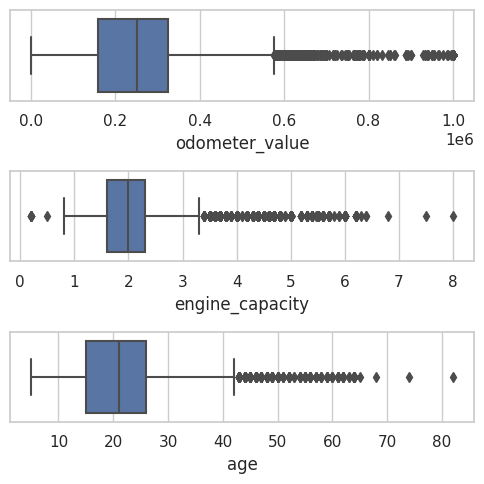

In [ ]:
fig, axs = plt.subplots(3, figsize=(5, 5))

plt1 = sns.boxplot(x=dataset_numeric['odometer_value'], ax=axs[0], orient='h')
plt2 = sns.boxplot(x=dataset_numeric['engine_capacity'], ax=axs[1], orient='h')
plt3 = sns.boxplot(x=dataset_numeric['age'], ax=axs[2], orient='h')

plt.tight_layout()

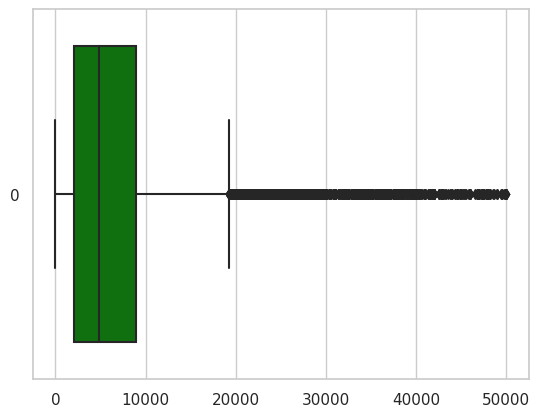

In [ ]:
sns.boxplot(dataset_numeric['price_usd'], orient='h', color= 'green')
plt.show()

We'll use scatter plot to see how the price related with other variables.

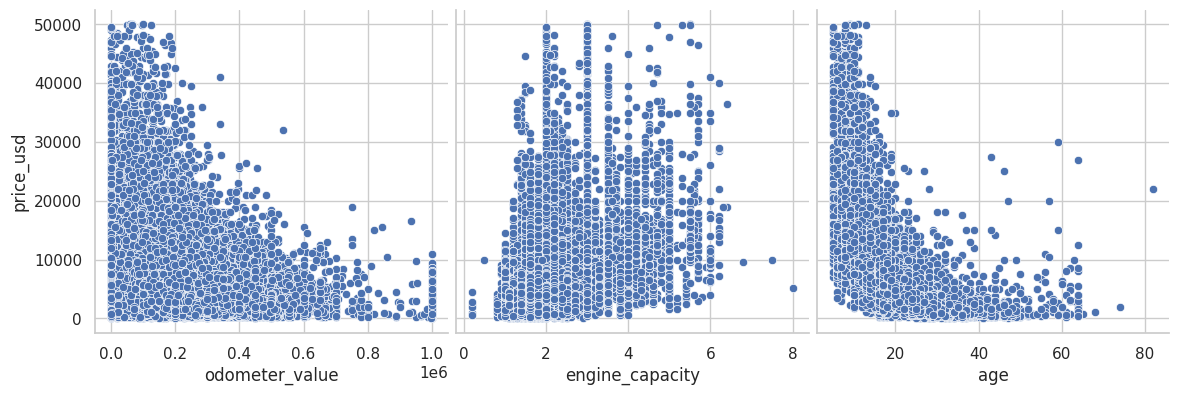

In [ ]:
sns.pairplot(dataset, x_vars=['odometer_value', 'engine_capacity', 'age'], y_vars='price_usd', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# Correlation matrix
corr = dataset_numeric.corr()
corr

,odometer_value,engine_capacity,price_usd,age
odometer_value,1.000000,0.105704,-0.420965,0.488448
engine_capacity,0.105704,1.000000,0.296597,-0.005059
price_usd,-0.420965,0.296597,1.000000,-0.705439
age,0.488448,-0.005059,-0.705439,1.000000


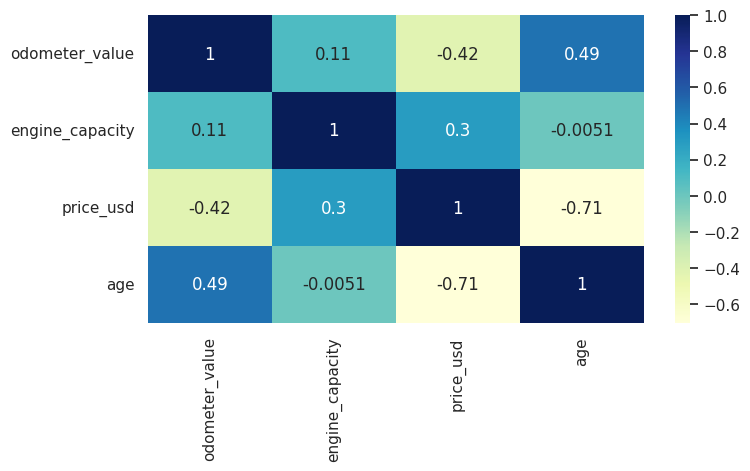

In [ ]:
# Figure size
plt.figure(figsize=(8,4))

# Heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

We can see that *age* has the highest correlation with the price (-0.71). The price is also correlated with *odometer_value* and *engine_capacity*.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['odometer_value', 'engine_capacity', 'age']

scaler = MinMaxScaler()

dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

dataset.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,age
0,45,763,0,8,0.190,2,0,1,0.294872,10,0,2,0,10900.00,0.116883
1,45,763,0,1,0.290,2,0,1,0.358974,10,0,2,0,5000.00,0.220779
2,45,519,0,7,0.402,2,0,1,0.294872,9,0,2,0,2800.00,0.233766
3,45,609,1,1,0.010,2,0,1,0.358974,8,0,2,0,9999.00,0.259740
4,45,664,0,0,0.280,2,0,1,0.294872,10,0,2,0,2134.11,0.233766


# **3. Training a Linear Regression Model:**

## **3.1. Spliting the dataset into training and testing sets:**

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('price_usd', axis=1)
y = dataset['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (26964, 14) (26964,)
Testing set shape: (11557, 14) (11557,)


In [ ]:
X_train.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,age
32553,43,958,0,0,0.135000,0,0,0,0.230769,10,0,2,1,0.038961
17345,48,777,1,1,0.346582,2,0,1,0.205128,8,0,2,1,0.363636
35778,31,273,1,1,0.201000,2,0,1,0.166667,6,0,2,1,0.116883
15691,48,918,1,0,0.450000,1,1,1,0.230769,6,0,2,1,0.298701
28609,3,12,1,4,0.380000,0,0,0,0.230769,2,0,2,2,0.181818


In [ ]:
y_train.head()

32553    17550.0
17345     1650.0
35778     9500.0
15691     3700.0
28609     6300.0
Name: price_usd, dtype: float64

## **3.2. Building the linear model:**

In [ ]:
import statsmodels.api as sm

In [ ]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr_model = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr_model.params

const                12948.293050
manufacturer_name        2.810736
model_name               0.100296
transmission         -1631.059664
color                  -13.545481
odometer_value       -6898.158258
engine_fuel            760.349531
engine_has_gas          72.412974
engine_type          -3022.888404
engine_capacity      18438.403558
body_type               67.694327
has_warranty          9273.037322
state                   -1.078550
drivetrain            -653.928004
age                 -32910.510657
dtype: float64

In [ ]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3490.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:05:18   Log-Likelihood:            -2.6087e+05
No. Observations:               26964   AIC:                         5.218e+05
Df Residuals:                   26949   BIC:                         5.219e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.295e+04    279.02

# **4. Model Evaluation:**

In [ ]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr_model.predict(X_test_sm)

In [ ]:
y_pred.head()

36172     899.928252
5488     5057.261135
2576     7321.281737
30361     196.695558
15468    9472.843287
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3798.9124742982212

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.642059670702593

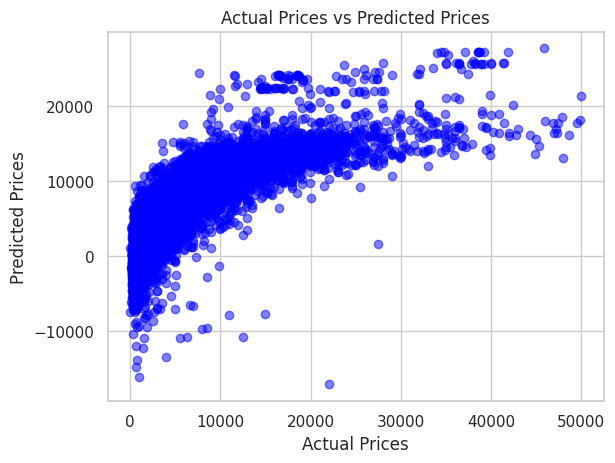

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **5. Feature Importance Analysis:**

From the parameters that we got, the linear regression equation becomes:\
**Price = 12948.293050 + 2.810736 × manufacturer_name + 0.100296 × model_name − 1631.059664 × transmission − 13.545481 × color − 6898.158258 × odometer_value +
 760.349531 × engine_fuel + 72.412974 × engine_has_gas − 3022.888404 ×
  engine_type + 18438.403558 × engine_capacity + 67.694327 × body_type + 9273.037322 × has_warranty − 1.078550 × state − 653.928004 × drivetrain − 32910.510657 × age** \

\
* **Engine Capacity (18438.403558):** A higher engine capacity is associated with a
higher predicted price. This is in line with the expectation that cars with larger engines tend to be more expensive. \
* **Has Warranty (9273.037322):** The presence of a warranty has a positive impact on the predicted price. Cars with warranties are often perceived as more reliable and may have a higher resale value. \
* **Age (-32910.510657):** The age of the car has a significant negative impact on the predicted price. As cars get older, their value tends to decrease. \
* **Transmission (-1631.059664):** Automatic transmissions have a negative impact on the predicted price compared to manual transmissions. \
* **Odometer Value (-6898.158258):** Higher odometer values (mileage) are associated with lower predicted prices. This is consistent with the common expectation that cars with lower mileage are often considered more valuable. \
* Other coefficients (manufacturer_name, model_name, color, engine_fuel, engine_has_gas, engine_type, body_type, state, drivetrain) contribute to the predicted price, but their impact is smaller compared to the features mentioned above.